# Human Activity Recognition (HAR) explore

In [1]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
% ls data/train/Inertial\ Signals/
% ls

ls: cannot access data/train/Inertial Signals/: No such file or directory
checkpoints/       data/                    HAR-CNN.ipynb       img/
checkpoints-cnn/   explore_data.ipynb       HAR-CNN_LSTM.ipynb  README.md
checkpoints-crnn/  HAR-CNN-Inception.ipynb  HAR-LSTM.ipynb      utils/


In [3]:
# import os
# # Fixed params
# n_class = 6
# n_steps = 128

# # Paths
# # path_ = os.path.join(data_path='./data/', split='train')
# path_ = os.path.join('./data/', 'train')
# path_
# path_signals = os.path.join(path_, "Inertial_Signals")
# path_signals

# split = 'train'

# # Read labels and one-hot encode
# label_path = os.path.join(path_, "y_" + split + ".txt")
# label_path
# labels = pd.read_csv(label_path, header = None)
# labels.shape

# # Read time-series data
# # path_signals, os.listdir(path='./data/train/Inertial Signals')
# channel_files = os.listdir(path=path_signals)
# # channel_files.sort()
# # n_channels = len(channel_files)
# # posix = len(split) + 5


In [4]:
X_train, labels_train, list_ch_train = read_data(data_path="./data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="./data/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [5]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))

Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 2947, steps = 128, channels = 9


In [6]:
# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

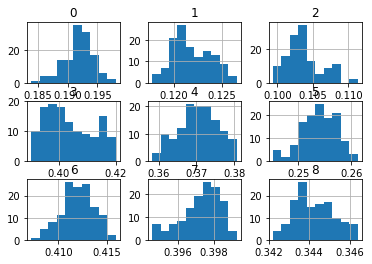

In [7]:
df_std.hist()
plt.show()

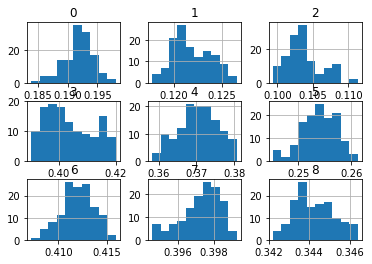

In [8]:
df_std.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all

In [9]:
X_train, X_test = standardize(X_train, X_test)

In [10]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

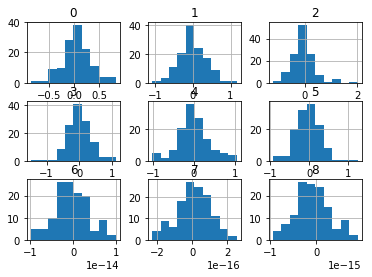

In [11]:
df_mean.hist()
plt.show()